In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('quikr_car.csv')

In [3]:
df.head(5)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

<AxesSubplot:>

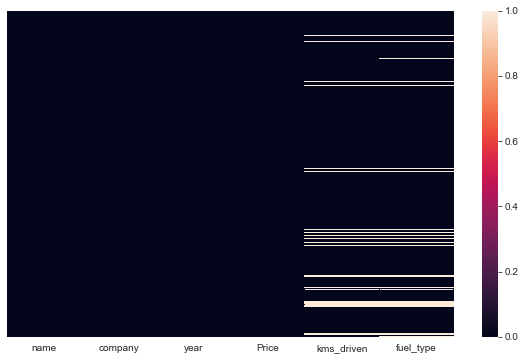

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False)

## Data Cleaning

### name 

In [8]:
df['name'].value_counts()

Honda City                             13
Honda Amaze                            11
Maruti Suzuki Dzire                    10
Mahindra Scorpio S10                    9
Maruti Suzuki Alto 800 Lxi              9
                                       ..
Maruti Suzuki Maruti 800 Std – Befo     1
Renault Lodgy                           1
Maruti Suzuki 800 Std BS III            1
BMW 3 Series 320d Sedan                 1
Chevrolet Spark 1.0 LT                  1
Name: name, Length: 525, dtype: int64

In [9]:
# The 'name' feature has company names attached to it while some names are spam like 'Maruti Ertiga showroom 
# condition with' and 'Well mentained Tata Sumo'
# I just extract the first 3 words as the name of the car and assign it to df['name']


df['name'] = df['name'].str.split().str.slice(start=0,stop=3).str.join(" ")

In [10]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel


### year

In [11]:
df['year'].value_counts()

2015    117
2013     94
2014     94
2016     76
2012     75
       ... 
n...      1
digo      1
Sumo      1
, Ac      1
e...      1
Name: year, Length: 61, dtype: int64

In [12]:
## The 'year' feature has many rows which are not dates but absurd entries.

df = df[df['year'].str.isnumeric()]


In [13]:
df['year'] = df['year'].astype(int)    #changing it to integer

In [14]:
df['year'].value_counts()

2015    117
2014     94
2013     94
2016     76
2012     75
2011     60
2009     56
2017     56
2010     44
2018     34
2019     22
2006     22
2007     19
2008     16
2005     13
2003     13
2004     12
2000      7
2002      5
2001      5
1995      2
Name: year, dtype: int64

### price 

In [15]:
## The 'price' feature has lots of non numeric values which needs to be removed. Also, the data type is object & it
## should be changed to integer

In [16]:
df['Price'].value_counts()

Ask For Price    23
2,50,000         16
3,50,000         12
1,80,000         11
4,00,000         11
                 ..
15,99,000         1
1,79,999          1
4,74,999          1
9,70,000          1
5,90,000          1
Name: Price, Length: 273, dtype: int64

In [17]:
df = df[df['Price'] != "Ask For Price"]

In [18]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel


In [19]:
## Price still has commas which needs to be removed and dtype to be changed to integer

df['Price'] = df['Price'].str.replace(',','').astype(int)

In [20]:
df['Price'].dtype

dtype('int32')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

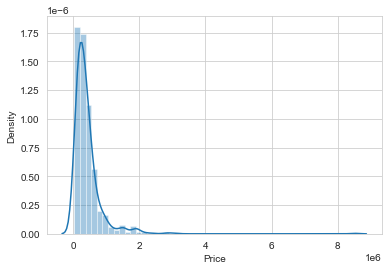

In [21]:
#df['Price'].hist(bins=10)
sns.distplot(df['Price'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

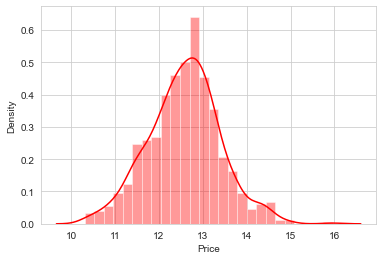

In [22]:
sns.distplot(np.log(df['Price']), color = 'red')

Log Transforming gives a better normal distribution

### kms_driven

In [23]:
df['kms_driven'].value_counts()

45,000 kms      30
35,000 kms      29
55,000 kms      25
50,000 kms      23
20,000 kms      21
                ..
81,876 kms       1
52,500 kms       1
1,29,000 kms     1
58,559 kms       1
37,458 kms       1
Name: kms_driven, Length: 250, dtype: int64

In [24]:
## Here kms has to be removed along with commas and dtype to be made integer.

df['kms_driven'] = df['kms_driven'].str.split().str.get(0).str.replace(",","")

In [25]:
## df['kms_driven'] has petrol and nan as vales which has to be removed

df = df[df['kms_driven'].str.isnumeric()] #Keeping only the numeric values of kms_driven in the dataset

In [26]:
df['kms_driven'] = df['kms_driven'].astype(int)

In [27]:
df['kms_driven'].dtype

dtype('int32')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kms_driven', ylabel='Density'>

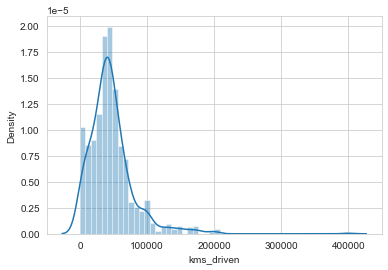

In [28]:
sns.distplot(df['kms_driven'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kms_driven', ylabel='Density'>

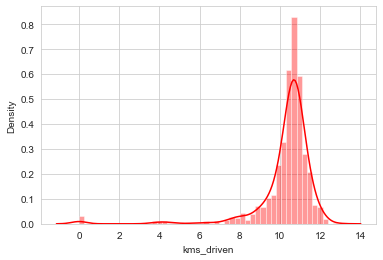

In [29]:
sns.distplot(np.log1p(df['kms_driven']), color = 'red')

No beneficial difference with log transformation

### fuel_type

In [30]:
df['fuel_type'].value_counts()

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

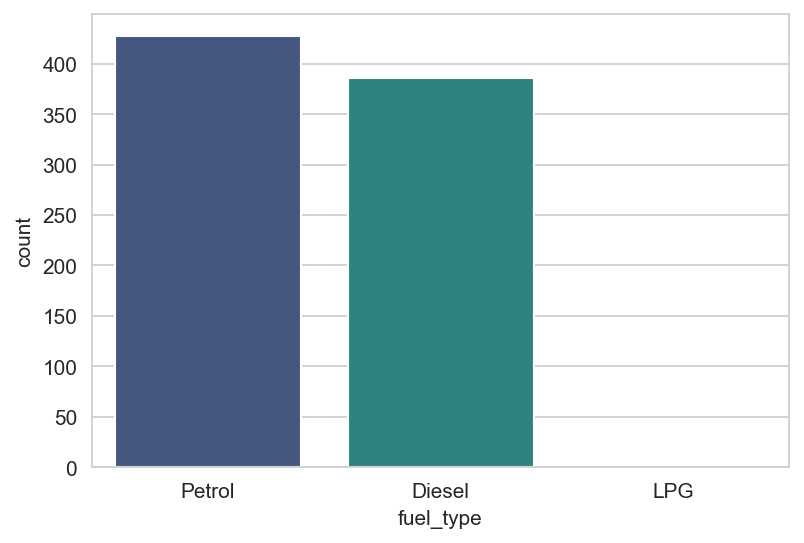

In [31]:
plt.figure(dpi = 150)
sns.countplot(df['fuel_type'], palette = 'viridis')

In [32]:
df.head(2)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel


In [33]:
df.shape

(817, 6)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 67.4+ KB


In [35]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [36]:
## Now fuel_type has only 1 null value which can be removed.

df = df[~df['fuel_type'].isna()]

In [37]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [38]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


## Bivariate Analysis

In [39]:
df.head(1)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol


#### company & Price

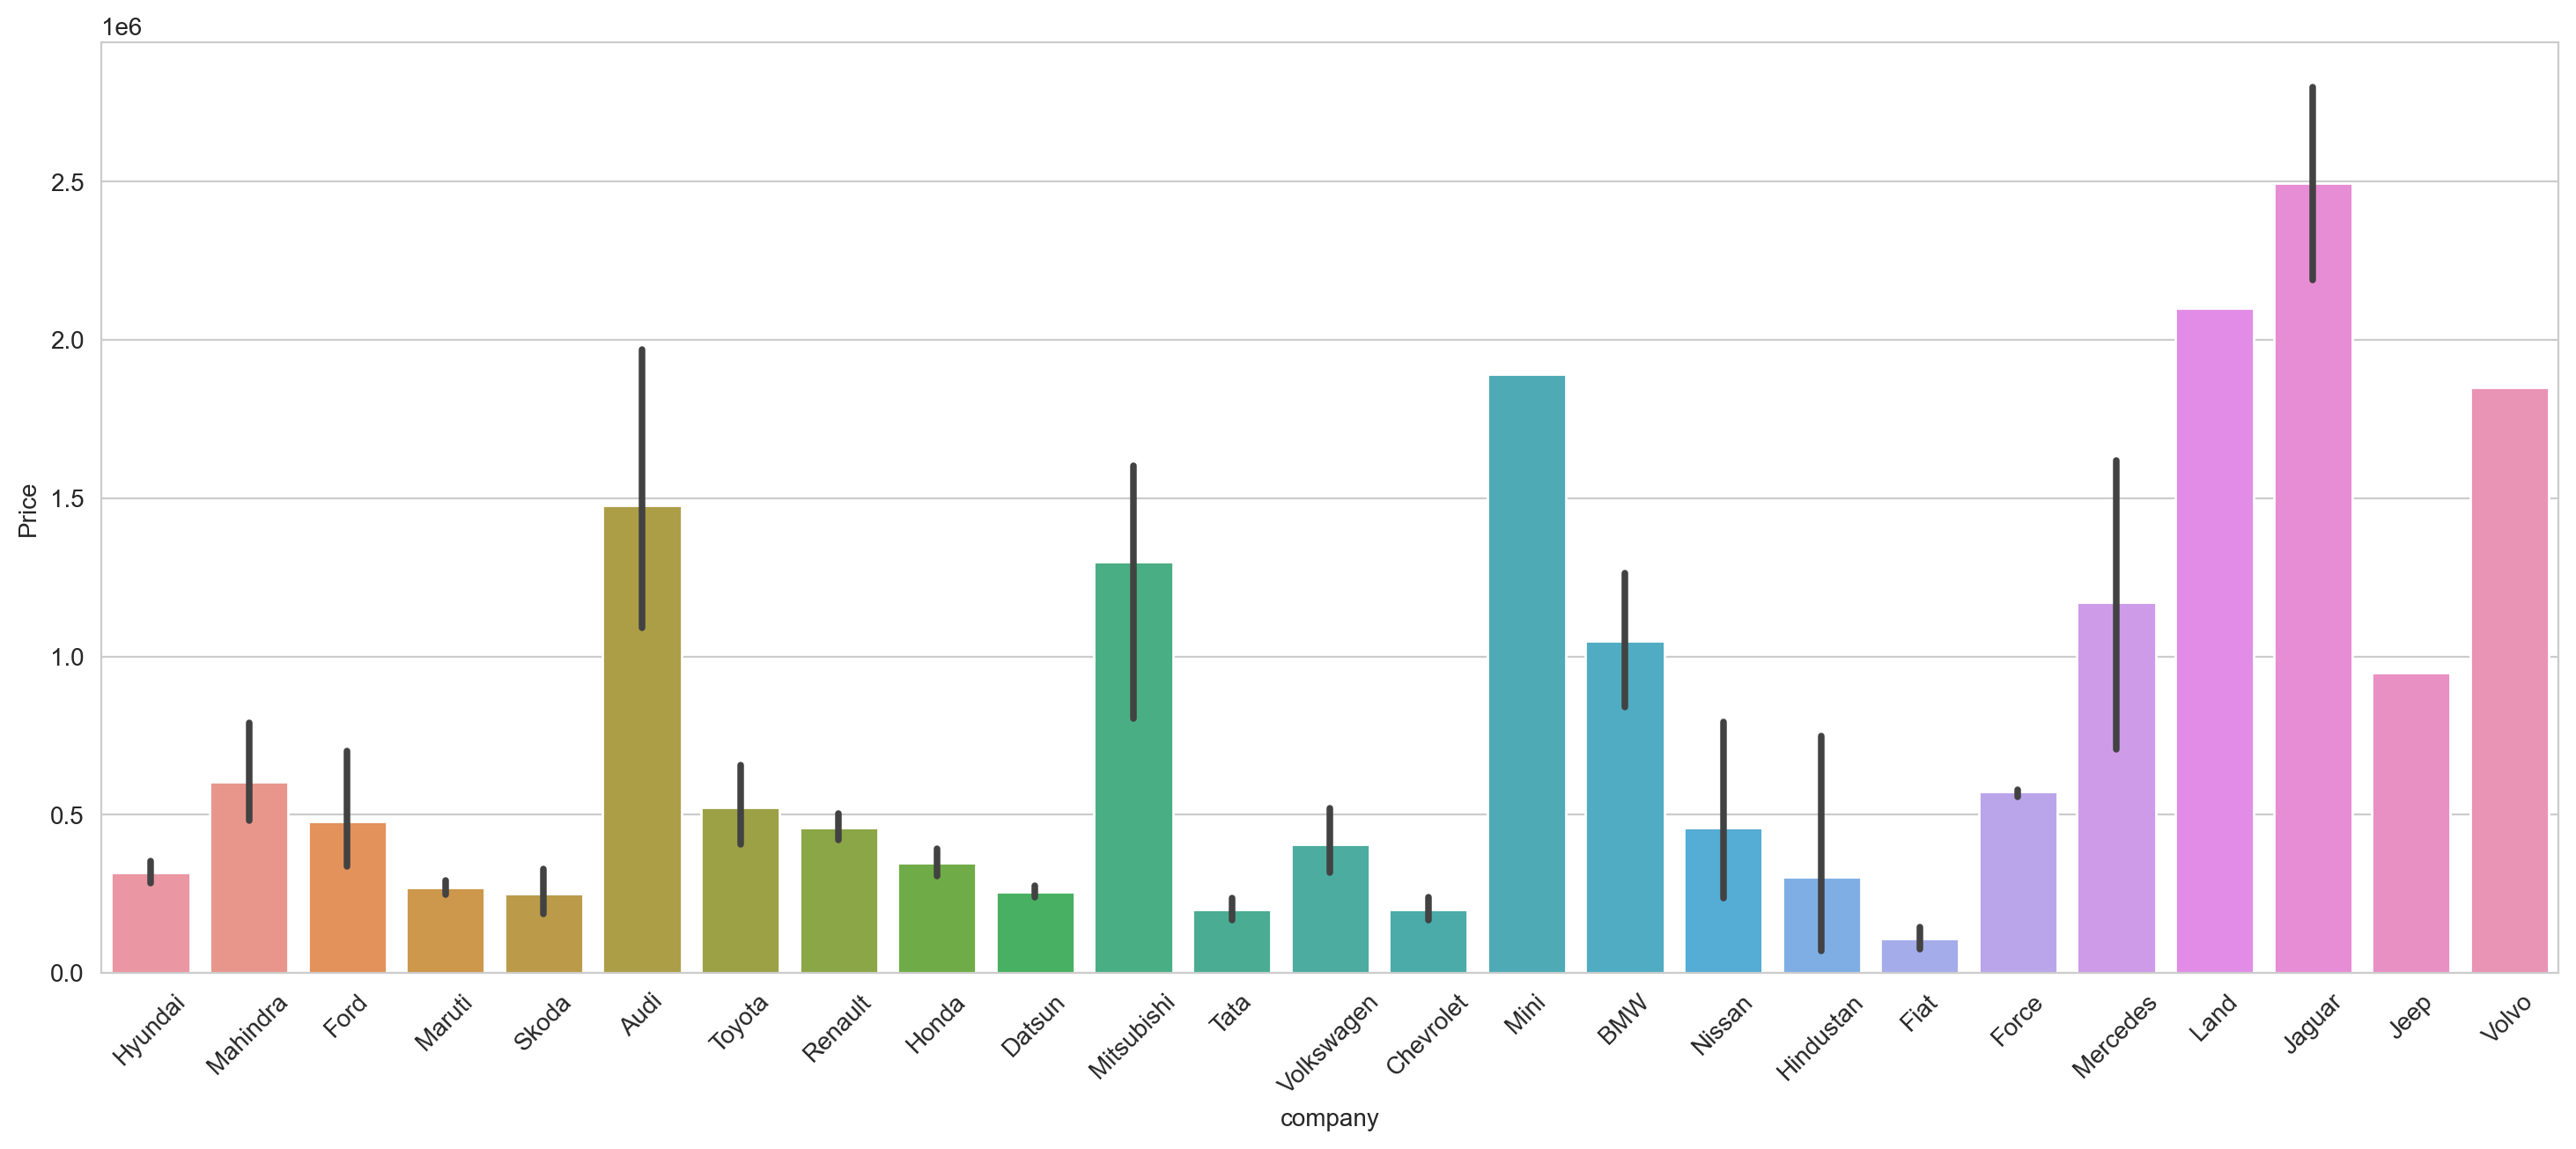

In [40]:
plt.figure(figsize=(18,7), dpi=200)
sns.barplot(x='company',y='Price',data=df)
plt.xticks(rotation=45)
plt.show()

#### year & Price

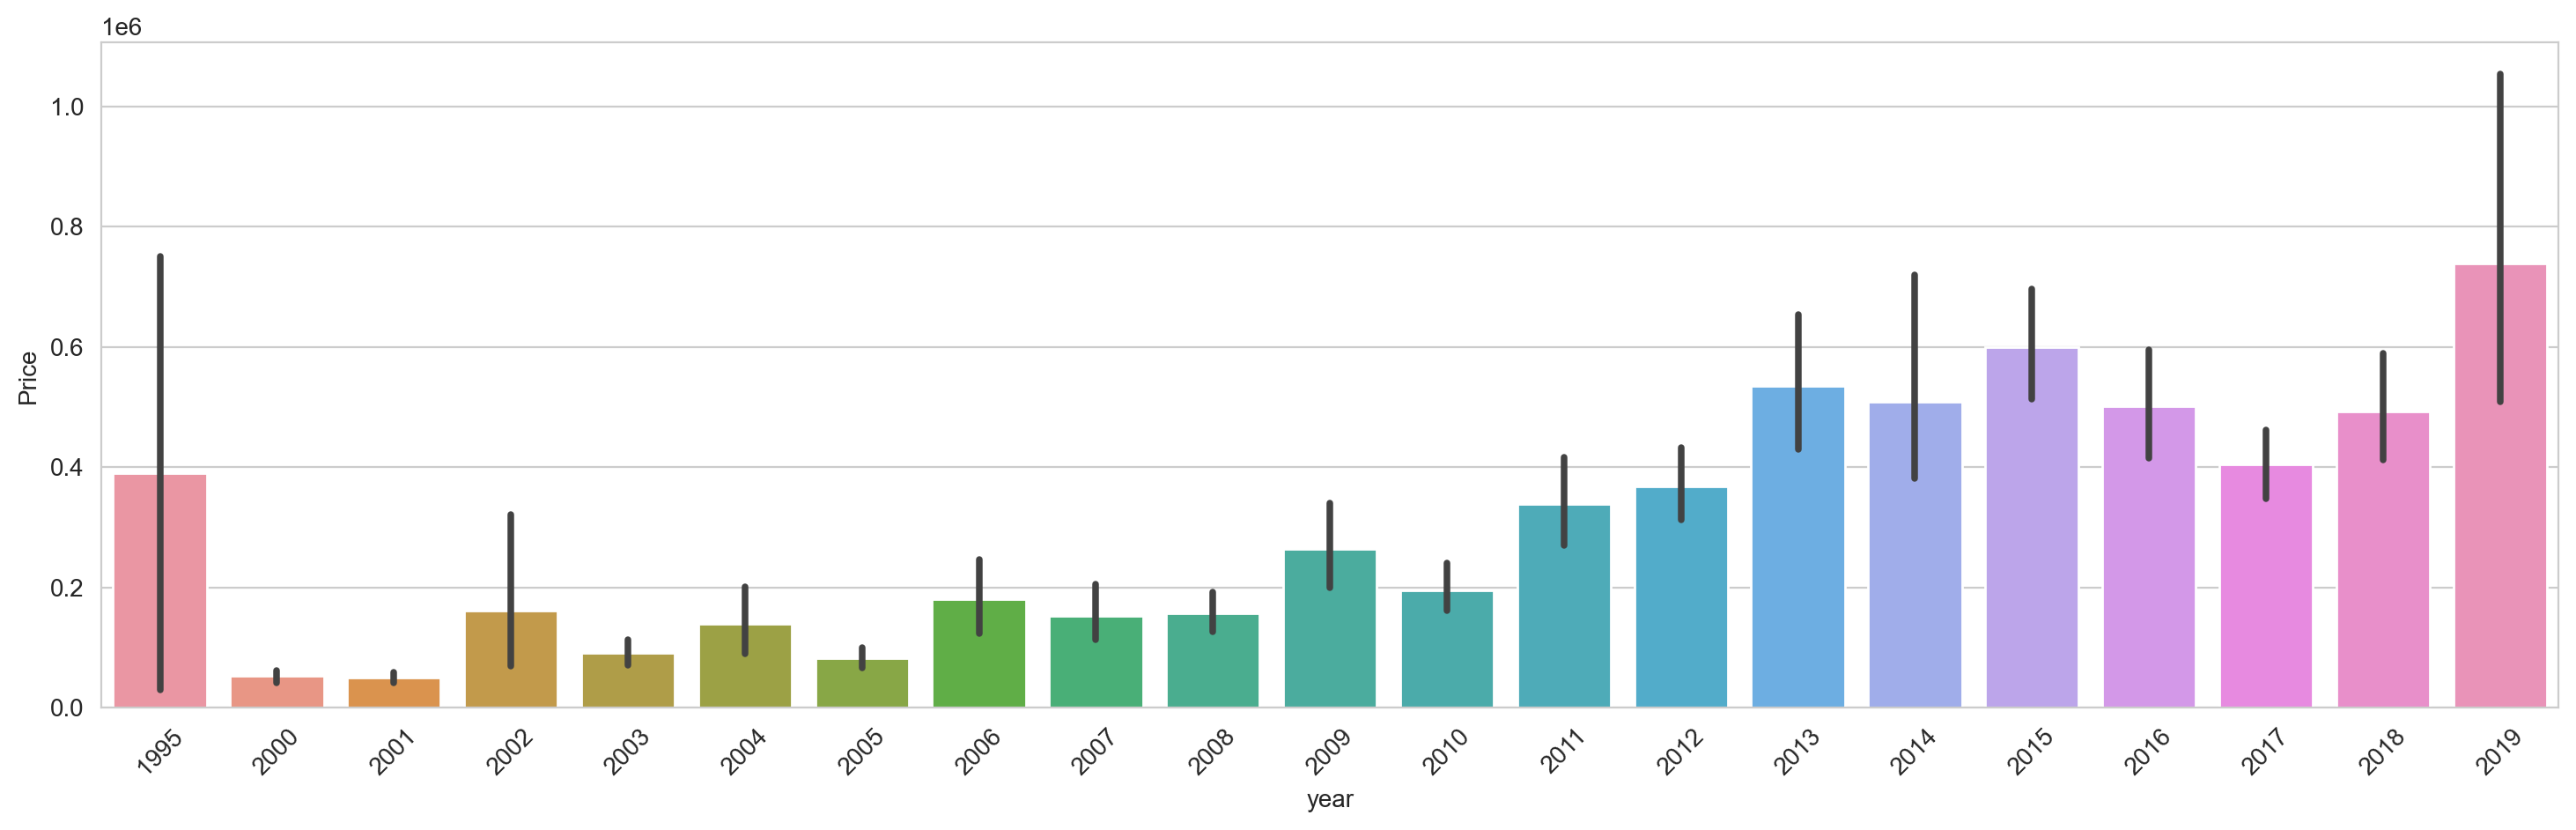

In [41]:
plt.figure(figsize=(18,5), dpi=200)
sns.barplot(data=df, x="year", y='Price')
plt.xticks(rotation=45)
plt.show()

#### kms_driven & Price

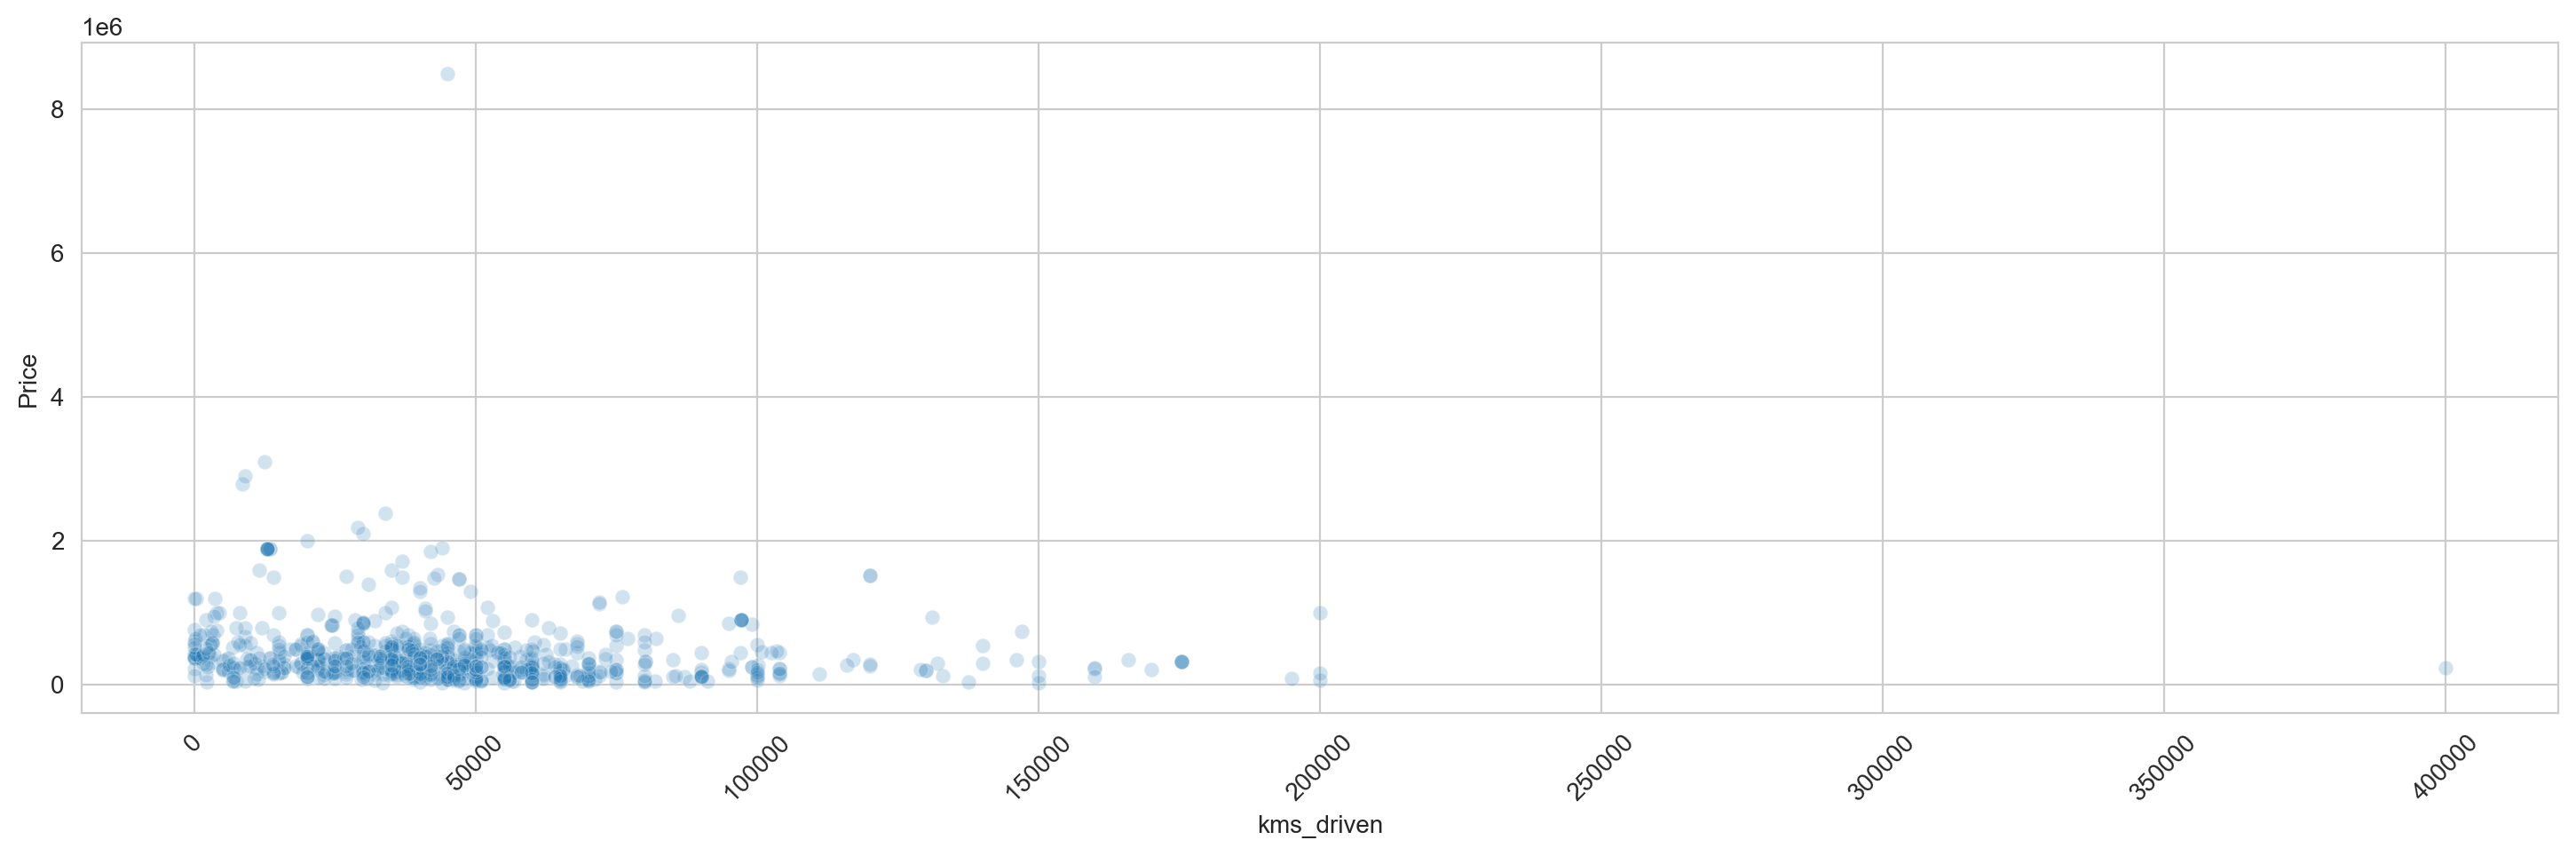

In [42]:
plt.figure(figsize=(18,5), dpi=200)
sns.scatterplot(data=df, x="kms_driven", y='Price', alpha=0.2)
plt.xticks(rotation=45)
plt.show()

#### fuel_type & Price

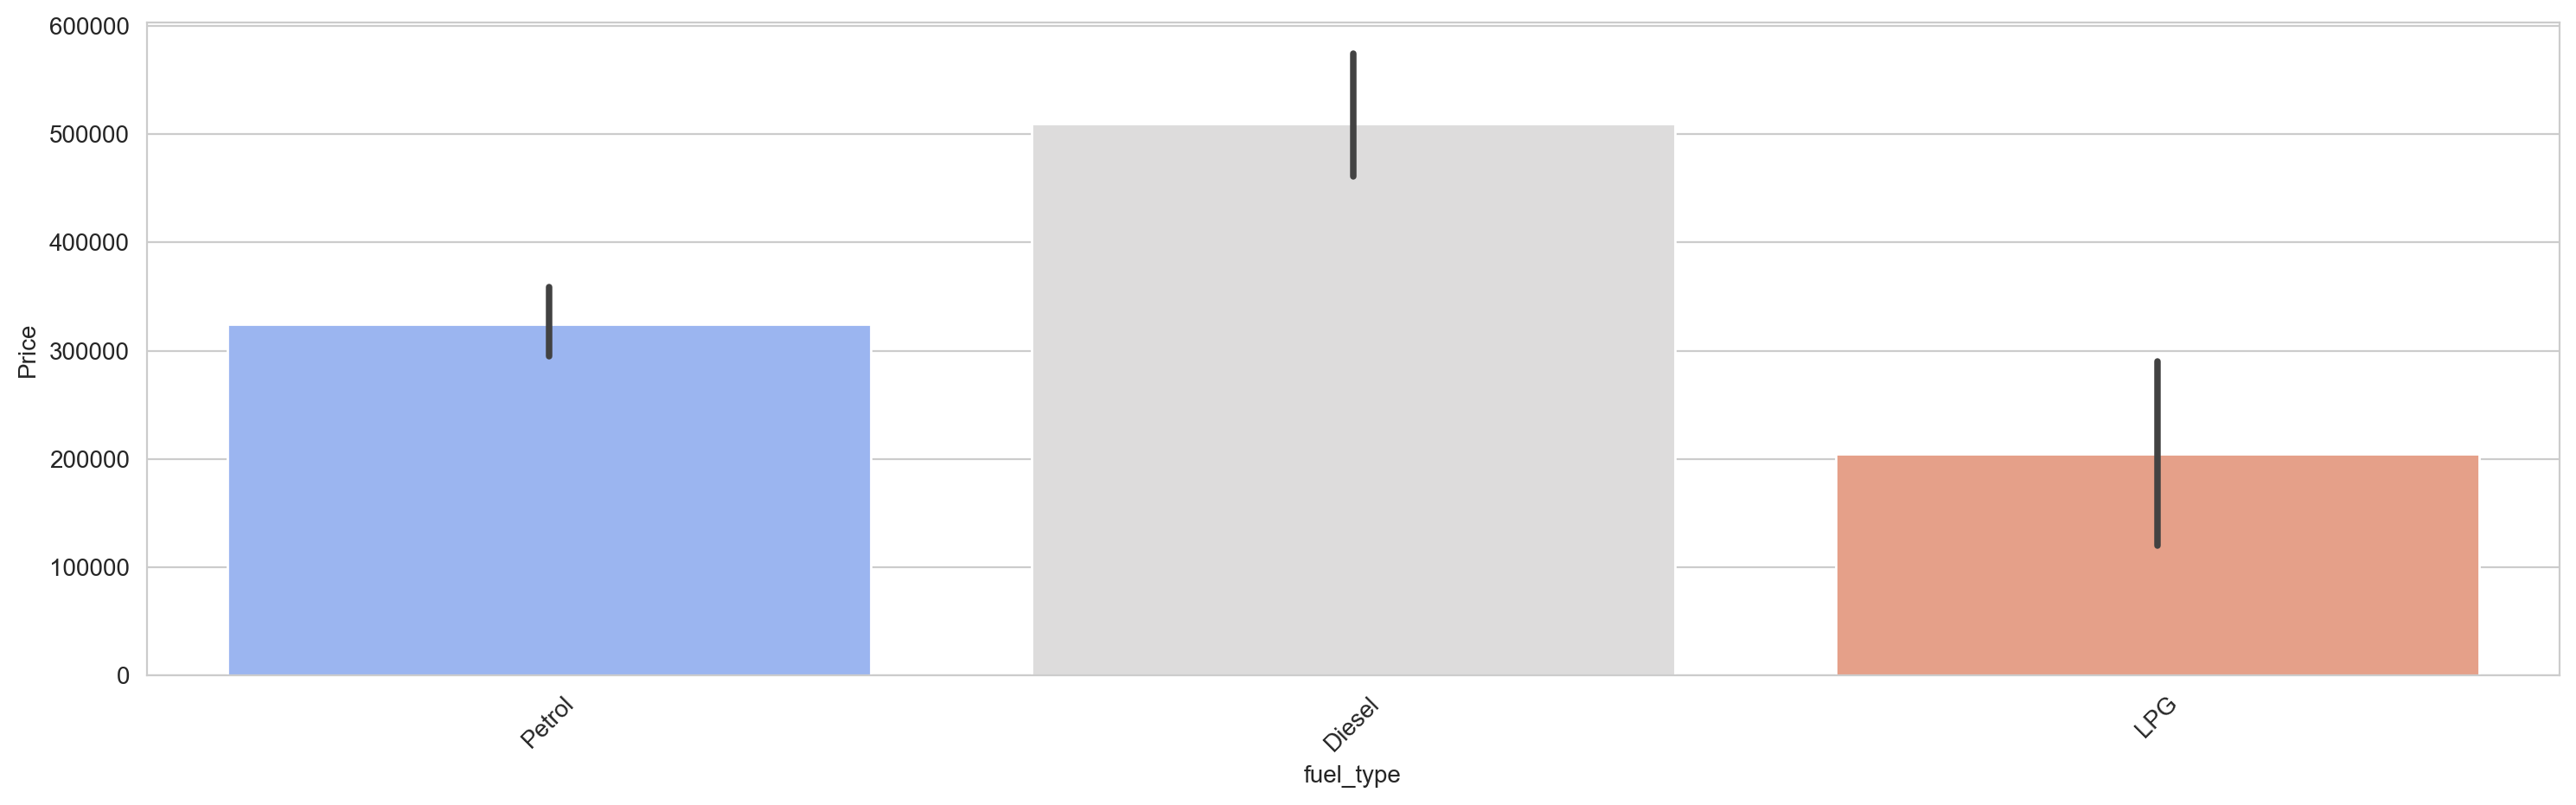

In [43]:
plt.figure(figsize=(18,5), dpi=200)
sns.barplot(data=df, x="fuel_type", y='Price', palette='coolwarm')
plt.xticks(rotation=45)
plt.show()

#### Fuel_type, Price & company

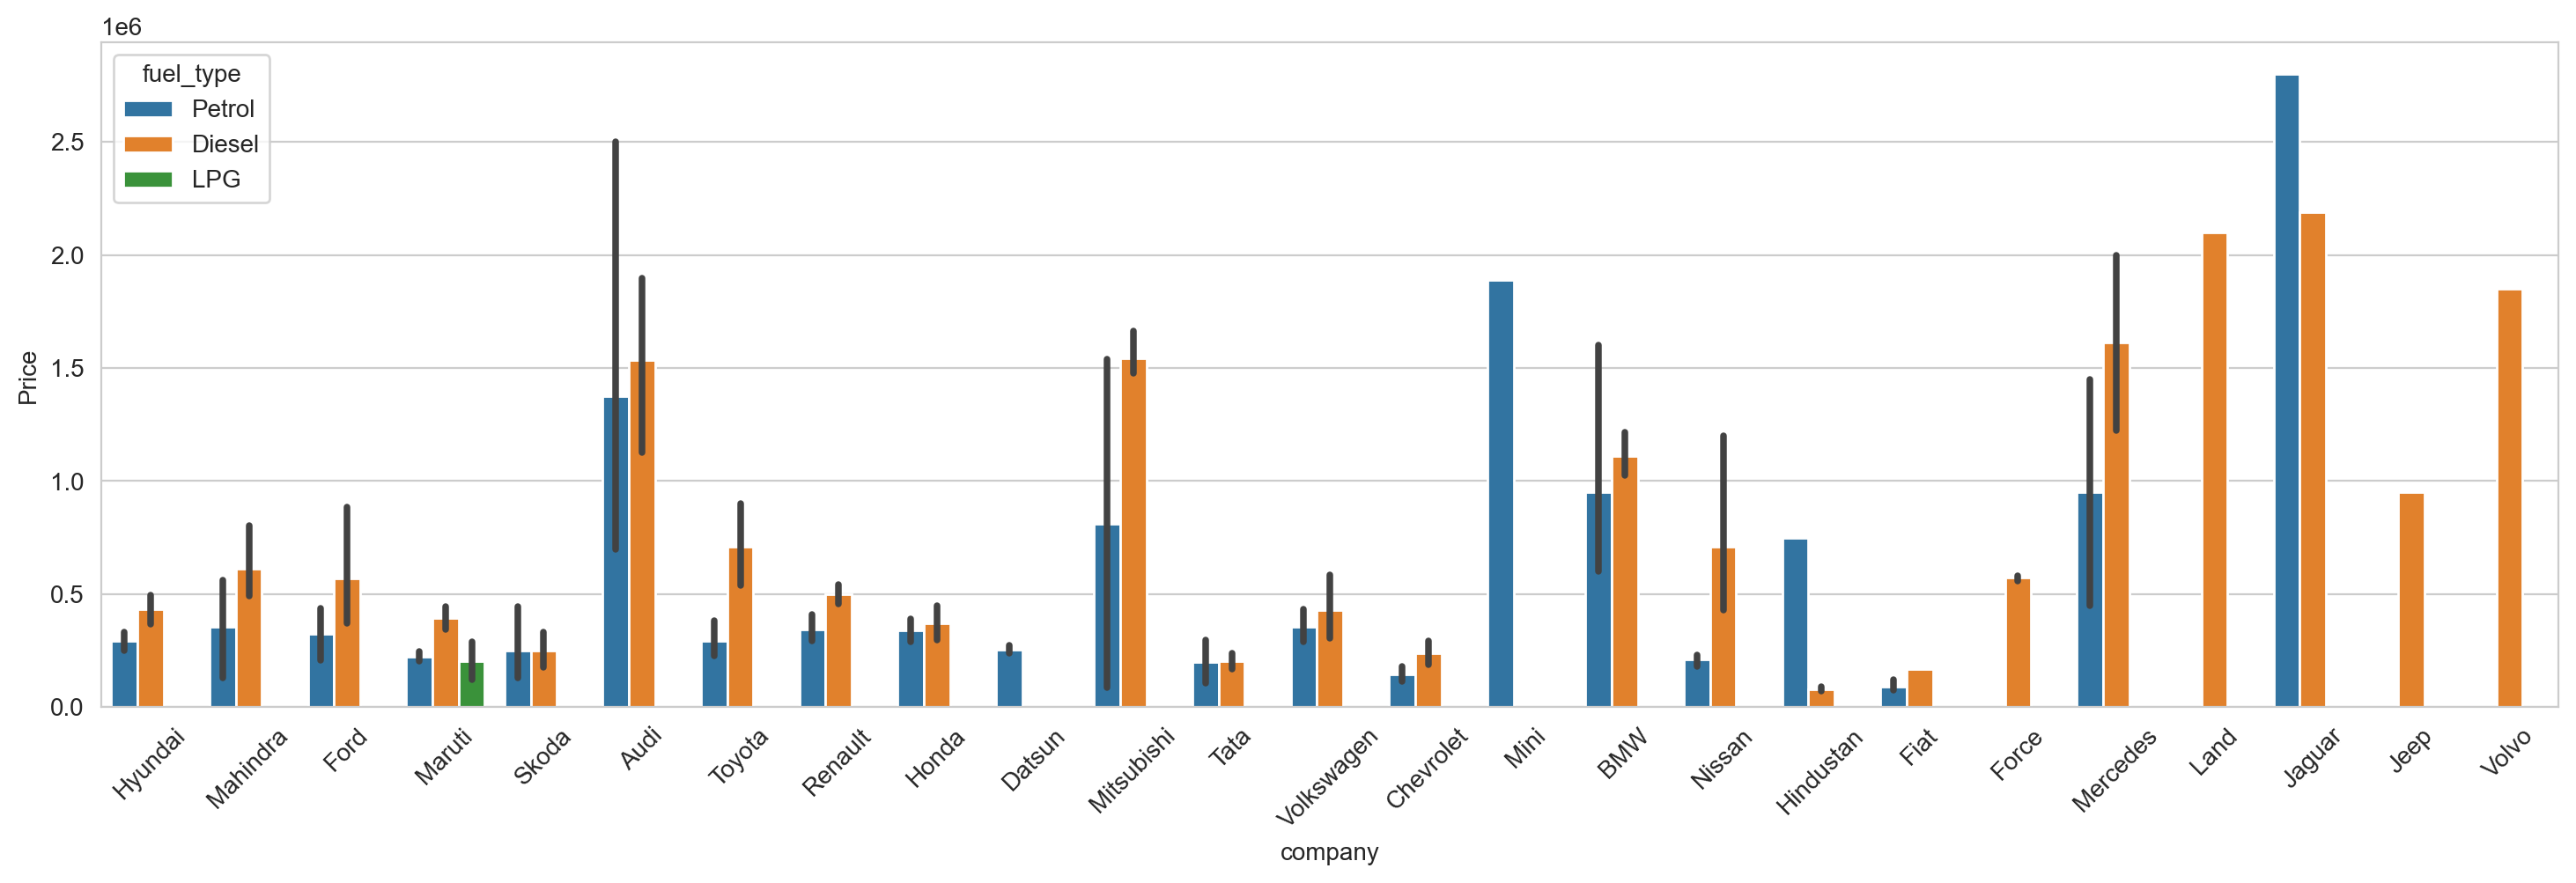

In [44]:
plt.figure(figsize=(18,5), dpi=200)
sns.barplot(x='company',y='Price',data=df, hue='fuel_type')
plt.xticks(rotation=45)
plt.show()

#### Price with FuelType, Year and Company

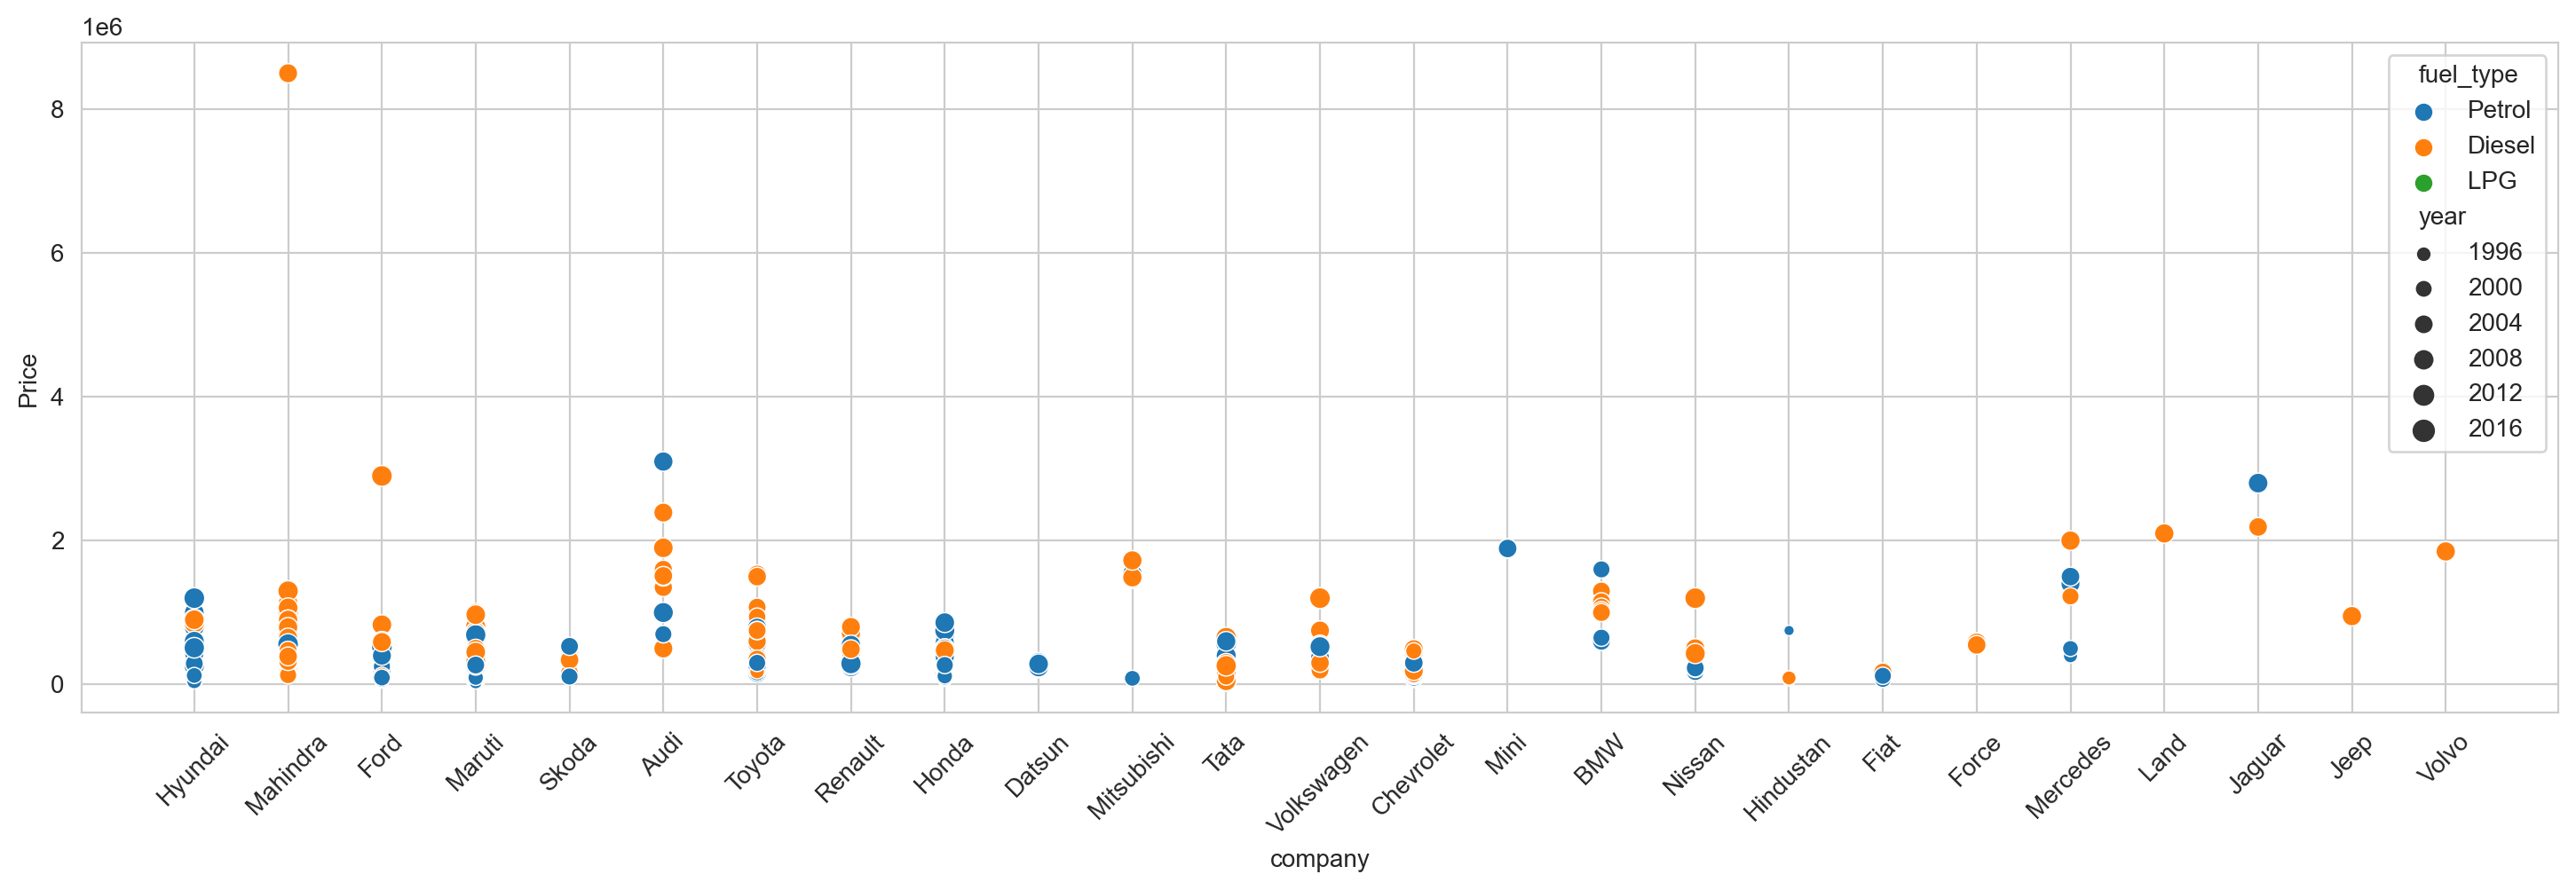

In [45]:
plt.figure(figsize=(18,5), dpi=200)
sns.scatterplot(x='company',y='Price',data=df, hue='fuel_type', size='year')
plt.xticks(rotation=45)
plt.show()

In [46]:
cor = df.corr()
cor

,year,Price,kms_driven
year,1.000000,0.287193,-0.233695
Price,0.287193,1.000000,-0.120854
kms_driven,-0.233695,-0.120854,1.000000


<AxesSubplot:>

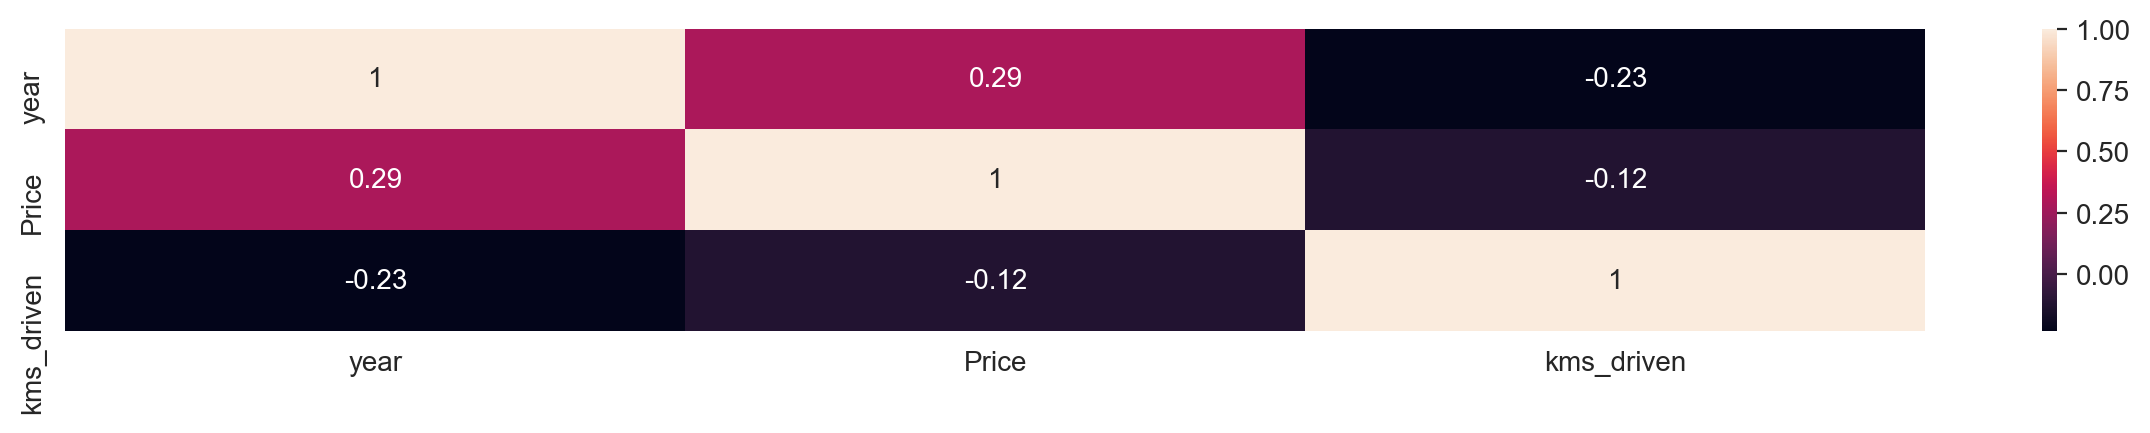

In [47]:
plt.figure(figsize=(15,2),dpi=200)
sns.heatmap(cor, annot=True)

### Model Building

In [48]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [49]:
X = df.drop('Price', axis=1)
y = np.log(df['Price'])  # Log Transforming the Price feature

In [50]:
X.shape, y.shape

((816, 5), (816,))

In [51]:
X.head(2)

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel


In [52]:
y.head(2)

0    11.289782
1    12.959844
Name: Price, dtype: float64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 67.4+ KB


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
set_config(display='diagram')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [56]:
# name, company and fuel_type has to be one hot encoded.

ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [57]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [58]:
# # Creating ColumnTransformer

# trf1 = ColumnTransformer([
#     ('ohe',OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
# ],remainder='passthrough')

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [60]:
# lreg = LinearRegression()

In [61]:
# pipe = Pipeline([
#     ('trf1', trf1),
#     ('LReg', lreg)
# ])

In [62]:
# pipe.fit(X_train, X_test)

In [63]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [64]:
lr=LinearRegression()

In [65]:
pipe=make_pipeline(column_trans,lr)

In [66]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [67]:
y_pred=pipe.predict(X_test)

In [68]:
r2_score(y_test,y_pred)

0.7472668136271206

In [69]:
# scores=[]
# for i in range(100):
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
#     lr=LinearRegression()
#     pipe=make_pipeline(column_trans,lr)
#     pipe.fit(X_train,y_train)
#     y_pred=pipe.predict(X_test)
#     scores.append(r2_score(y_test,y_pred))

In [70]:
# np.argmax(scores)

In [71]:
# scores[np.argmax(scores)]

In [72]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
# lr=LinearRegression()
# pipe=make_pipeline(column_trans,lr)
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# r2_score(y_test,y_pred)

### DecisionTree

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
dt = DecisionTreeRegressor()
pipe_dt = make_pipeline(column_trans,dt)
pipe_dt.fit(X_train,y_train)

y_pred_dt = pipe_dt.predict(X_test)


In [75]:
r2_score(y_test,y_pred_dt)

0.6469273912900146

### RandomForest

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf = RandomForestRegressor()

In [78]:
pipe_rf =  make_pipeline(column_trans,rf)

In [79]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [80]:
y_pred_rf = pipe_rf.predict(X_test)

In [81]:
r2_score(y_test,y_pred_rf)

0.6795032567781665

### SVR

In [82]:
from sklearn.svm import LinearSVR
LSVR = LinearSVR()

In [83]:
# pipe_lsvr = make_pipeline(column_trans,LSVR)
# pipe_lsvr.fit(X_train, y_train)
# y_pred_lsvr = pipe_lsvr.predict(X_test)

pipe_lsvr = make_pipeline(column_trans,LSVR)


In [84]:
pipe_lsvr.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearsvr', LinearSVR())])

In [85]:
y_pred_lsvr = pipe_lsvr.predict(X_test)

In [86]:
r2_score(y_test,y_pred_lsvr)

-7.846728957897184

## We choose Linear Regression for this dataset. 

#### Dataset has very few records. Hence result scores are low.